# Regularization - Ridge & Lasso Regression
Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting in linear regression. This notebook implements Ridge Regression (part 1) and Lasso Regression (part2) based on code examples from:
https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

---
## Part 1: Ridge Regression
Linear regression looks for optimizing the model parameters (regression coefficients) such that it minimizes the cost function, i.e. the sum of squared errors between the true and predicted values. 

In ridge regression, the cost function that is minimized is altered by adding a penalty equivalent to the (scaled=alpha) sum of the squared regression coefficients such that if the coefficients take large values, the optimization function is penalized. Thereby, ridge regression shrinks the coefficients and helps to reduce model complexity and multi-collinearity. Let’s look at an example for ridge regression using Boston house data.

In [35]:
# import packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge

In [36]:
# load dataset
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [37]:
# add another column that contains the house prices (target values)
boston_df['Price'] = boston.target
boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [39]:
# independent variables (features)
X = boston_df.drop('Price', axis=1)

# dependent variable (target)
Y = boston_df['Price']

In [45]:
# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

Now we fit to the data: a non-regularized linear regression model and two ridge regression models with different degrees of regularization (alpha = 0.01, alpha = 100). The higher the alpha value, the more restriction on the coefficients. For very low alpha values, coefficients are barely restricted and in this case ridge regression resembles the non-regularized linear regression.

In [46]:
# fit a linear regression model (without regularization) to the data

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
# fit a ridge regression model (with regularization) to the data

# alpha = 0.01 --> weak penalty/regularization
rr = Ridge(alpha = 0.01) 
rr.fit(X_train, y_train)

# alpha = 1 --> moderate penalty/regularization
rr1 = Ridge(alpha = 1) 
rr1.fit(X_train, y_train)

# alpha = 100 --> strong penalty/regularization
rr100 = Ridge(alpha = 100)
rr100.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [58]:
# R2 scores for all models

# non-regularized linear regression
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)
print("linear regression train score:", train_score.round(3))
print("linear regression test score:", test_score.round(3))
print('')

# ridge regression (alpha = 0.01)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
print("ridge regression train score - low alpha:", Ridge_train_score.round(3))
print("ridge regression test score - low alpha:", Ridge_test_score.round(3))
print('')

# ridge regression (alpha = 1)
Ridge_train_score1 = rr1.score(X_train,y_train)
Ridge_test_score1 = rr1.score(X_test, y_test)
print("ridge regression train score - moderate alpha:", Ridge_train_score1.round(3))
print("ridge regression test score - moderate alpha:", Ridge_test_score1.round(3))
print('')

# ridge regression (alpha = 100)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print("ridge regression train score - high alpha:", Ridge_train_score100.round(3))
print("ridge regression test score - high alpha:", Ridge_test_score100.round(3))

linear regression train score: 0.742
linear regression test score: 0.715

ridge regression train score - low alpha: 0.742
ridge regression test score - low alpha: 0.715

ridge regression train score - moderate alpha: 0.741
ridge regression test score - moderate alpha: 0.704

ridge regression train score - high alpha: 0.717
ridge regression test score - high alpha: 0.681


We can see that in this example, the non-regularized linear regression yields better R2 scores than ridge regression, and that the results for the ridge regression with a very low alpha (0.01) resemble the result of the non-regularized linear regression.

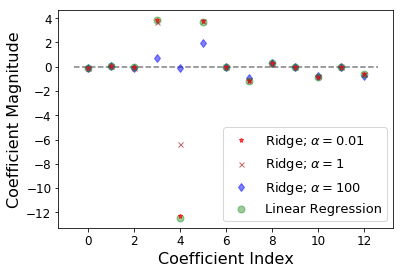

In [71]:
# plot the magnitude of the regression coefficients for all models

plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',
         label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr1.coef_,alpha=0.7,linestyle='none',marker='x',markersize=5,color='brown',
         label=r'Ridge; $\alpha = 1$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',
         label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',
         label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.hlines(0,plt.gca().get_xlim()[0],plt.gca().get_xlim()[1], linestyles='dashed',colors='gray')
plt.show()

We can see in the plot that ridge regression results in a **shrinkage** of the absolute magnitude of regression coefficients with indices 3-5 towards zero compared to non-regularized linear regression, at least for moderate to high alpha values.

---
## Part 2: Lasso Regression

Lasso stands for **L**east **A**bsolute **S**hrinkage and **S**election **O**perator. The difference between lasso and ridge regression is that some of the coefficients can be shrinked to zero in lasso regression, i.e. some of the features can be completely neglected in the resulting model. In contrast, coefficients can never completely shrink to zero in ridge regression. Hence, lasso regression not only helps in reducing over-fitting but it can also help in feature selection.

The cost function for Lasso regression penalizes model complexity by taking the (scaled=alpha) ***sum of the absolute magnitudes*** of all regression coefficients into account, instead of taking the ***sum of the squared*** regression coefficients (like ridge regression). Let's demonstrate lasso regression with sklearn's Breast Cancer dataset.

In [ ]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import math 

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [73]:
# load dataset
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [75]:
# independent variables (features)
X = cancer.data

# dependent variable (target)
y = cancer.target

In [76]:
# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

Next, we fit lasso regression models with different regularization parameter values (alpha, or lambda) to the training data and evaluate the resulting model scores (train R2, test R2) and the number of features that 'survived' feature selection.

In [83]:
# fit lasso model to training data and evaluate model

lasso = Lasso()
lasso.fit(X_train,y_train)
train_score = lasso.score(X_train,y_train)
test_score = lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print ("training score:", train_score.round(3))
print ("test score: ", test_score.round(3))
print ("number of features used: ", coeff_used)

training score: 0.56
test score:  0.583
number of features used:  4


In [84]:
# fit lasso model with a regularization parameter of alpha=0.01 (low regularization/penalty)

lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001 = lasso001.score(X_train,y_train)
test_score001 = lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=0.01:", train_score001.round(3))
print ("test score for alpha =0.01: ", test_score001.round(3))
print ("number of features used for alpha = 0.01:", coeff_used001)

training score for alpha=0.01: 0.704
test score for alpha =0.01:  0.664
number of features used for alpha = 0.01: 10


In [85]:
# fit lasso model with a regularization parameter of alpha=0.0001 (even lower regularization/penalty)

lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001 = lasso00001.score(X_train,y_train)
test_score00001 = lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print ("training score for alpha=0.0001:", train_score00001.round(3))
print ("test score for alpha =0.0001: ", test_score00001.round(3))
print ("number of features used for alpha = 0.0001:", coeff_used00001)

training score for alpha=0.0001: 0.775
test score for alpha =0.0001:  0.732
number of features used for alpha = 0.0001: 22


In [87]:
# compare to non-regularized linear regression

lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)
lr_coeff_used = np.sum(lr.coef_ != 0)
print ("LR training score:", lr_train_score.round(3)) 
print ("LR test score: ", lr_test_score.round(3))
print ("number of features used for lr:", lr_coeff_used)

LR training score: 0.784
LR test score:  0.733
number of features used for lr: 30


We can see that R2 scores for the non-regularized linear regression and the lasso regression with very low alpha (0.001) are very similar and better than the scores for lasso regressions with higher alpha values. Note, however, that the lasso regression with alpha=0.0001 only selected 22 features to be included in the model compared to all 30 features in the non-regularized linear regression model. Hence, lasso regression helped us in selecting the most important features for our model without significantly reducing the score of the model.

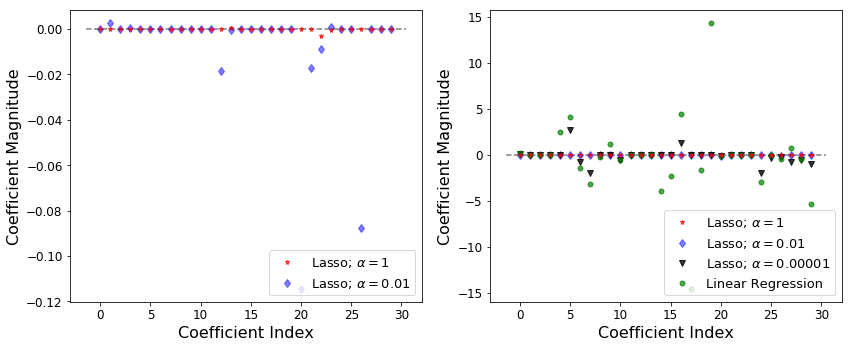

In [89]:
# plot the magnitude of the regression coefficients for all models

fig, ax = plt.subplots(1,2, figsize=(12,5))

# left plot: compare lasso with alpha 1 vs. 0.01
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,
         color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,
         color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.hlines(0,plt.gca().get_xlim()[0],plt.gca().get_xlim()[1], linestyles='dashed',colors='gray')
plt.legend(fontsize=13,loc=4)

# right plot: compare all models (linear regression and lasso with different alpha values)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,
         color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,
         color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,
         color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,
         color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.hlines(0,plt.gca().get_xlim()[0],plt.gca().get_xlim()[1], linestyles='dashed',colors='gray')
plt.show()

We can see in the plot that lasso regression results in **shrinkage** of the regression coefficient magnitudes - the higher the alpha value, the stronger the shrinkage. Some coefficients are even shrinked to zero in lasso regression, hence lasso helps in selecting only the most relevant features to be included in our model.